# Kernel Goals

There are two primary goals of this kernel.

    To do an exploratory data analysis of how some group of people was survived more than others through visualization.
    And to create a machine learning models that can predict the chances of passengers survival.



In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
import pandas as pd
import numpy as np

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Machine learning libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV



In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:

%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'><noscript><a href='#'><img alt='An Overview of Titanic Training Dataset ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Titanic_data_mining&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516349898238');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Cleaning the Data
  Dealing with different types of variables
  
    Numerical Features: Age, Fare, SibSp and Parch
    Categorical Features: Sex, Embarked, Survived and Pclass
    Alphanumeric Features: Ticket and Cabin
    Text Features: Name


In [8]:


## Setting passengerID as Index since it wont be necessary for the analysis
#train = train.set_index("PassengerId")
## Dropped name and Cabin column since they will not be much of help with the analysis.
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S


In [9]:
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1


In [10]:
## Renaming the Sex_male column to Gender, since this will be quite important part of this notebook later on. 
train = train.rename(columns={"Sex_male": "Gender"})
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0


In [16]:
train.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Gender          0
Embarked_Q      0
Embarked_S      0
dtype: int64


There are different ways to deal with Null values. Some standard approaches are mean, median and mode. However, we will take a different approach since ~20% data in the Age column is missing and it would be unwise to replace the missing values with median, mean or mode. We will use pythons library fancyimpute where I can use the idea of KNN which is imputing nearest neighbor value instead of a Null value. Let's see how this works


In [19]:
from fancyimpute import KNN
age_filled_data = KNN(k=10).complete(train)

Using TensorFlow backend.


Imputing row 1/891 with 0 missing, elapsed time: 0.126
Imputing row 101/891 with 0 missing, elapsed time: 0.191
Imputing row 201/891 with 0 missing, elapsed time: 0.192
Imputing row 301/891 with 1 missing, elapsed time: 0.193
Imputing row 401/891 with 0 missing, elapsed time: 0.194
Imputing row 501/891 with 0 missing, elapsed time: 0.195
Imputing row 601/891 with 0 missing, elapsed time: 0.196
Imputing row 701/891 with 0 missing, elapsed time: 0.197
Imputing row 801/891 with 0 missing, elapsed time: 0.198


In [21]:
df = pd.DataFrame(age_filled_data, columns = train.columns)
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0


In [22]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Gender        0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Exploratory Data Analysis(EDA)

In [25]:
# Looks like only 38% Passenger/crew have survived and 62% were not able to survive. 
df.Survived.value_counts()/len(df)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

In [36]:
# Overview(Survived vs non survied)
survived_summary = df.groupby("Survived")
survived_summary.mean()

,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
Survived,,,,,,,,
0.0,2.531876,31.072721,0.553734,0.329690,22.117887,0.852459,0.085610,0.777778
1.0,1.950292,28.185130,0.473684,0.464912,48.395408,0.318713,0.087719,0.634503


# 3b. Correlation Matrix and Heatmap

In [38]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.102389,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.376435,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,-0.102389,-0.376435,1.000000,-0.214757,-0.182113,0.102293,0.131514,-0.025351,-0.010465
SibSp,-0.035322,0.083081,-0.214757,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.182113,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.102293,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Gender,-0.543351,0.131900,0.131514,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.025351,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.010465,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


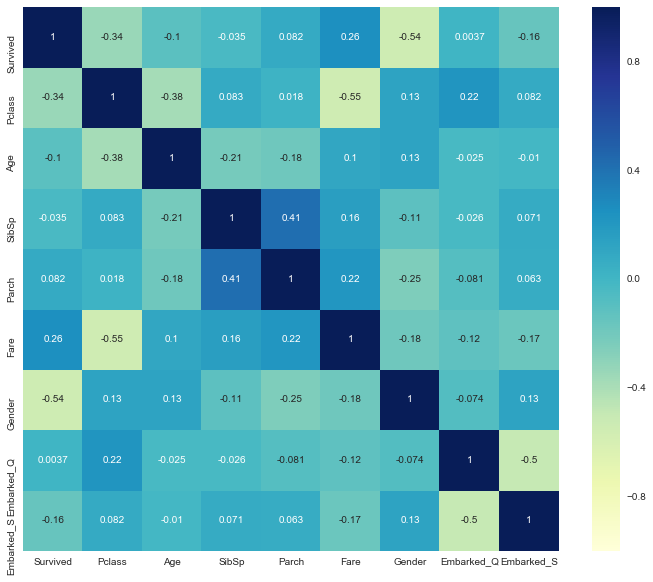

In [44]:
plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot=True,  cmap="YlGnBu")

# Positive Correlation Features:

    Fare and Survived: 0.26

Negative Correlation Features:

    Fare and Pclass: -0.55
    Gender and Survived: -0.54
    Pclass and Survived: -0.34

So, Let's analyze these correlations a bit. We have found some moderately strong correlations between different features. There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.55). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.34. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the biggest correlation with our dependent variable is the Gender variable, which basically is the info of whether the passenger was male or female. this is a negative correlation with a magnitude of -0.54 which definitely points towards some undeniable insights. Let's do some statistics to see how undeniable this insight is.


Statistical Test for Correlation

# Statistical Test for Correlation

# One-Sample T-Test(Measuring male-female ratio)¶

A one-sample t-test checks whether a sample mean differs from the population mean. Since Gender has the highest correlation with the dependent variable Survived, 
we can test to see if the mean Gender that survived differs from mean Gender that did not survive.

Note: There are two types of outcome in the Gender variable, "0" and "1", "0" being the gender as female and "1" being the gender as "male". Therefore, while determining average of Gender, we should keep in mind that, an increase in the average gender means an increase in male passengers, similarly a decrease in the average gender mean a reduction in male passengers, therefore increase in female passengers and so on

Hypothesis Testing: Is there a significant difference in the mean Gender between the passenger who survived and passenger who did not survive?

    Null Hypothesis(H0) The null hypothesis would be that there is no difference in the mean Gender between the passenger who survived and passenger who did not survive.
    Alternative Hypothesis(H1): The alternative hypothesis would be that there is a difference in the mean Gender between the passenger who survived and those who did not.



In [49]:
## Lets compare the means of gender for passengers who survived and the passengers who didnot survive. 

avg_survived = df[df["Survived"]==1]["Gender"].mean()
print ("The average gender for the passengers who survived is: " + str(avg_survived))
avg_not_survived = df[df["Survived"]==0]["Gender"].mean()
print ("The average gender for the passengers who did not survive is: " + str(avg_not_survived))



The average gender for the passengers who survived is: 0.318713450292
The average gender for the passengers who did not survive is: 0.852459016393



The T-Test

Let's conduct a T-Test at 95% 
confidence level. The T-Test statistics
will tell us how much the sample of the survived passengers(in statistics languange this is the sample) 
alligns with the means of passenger(in statistics language this is population mean) who did not survive. 
if the test statistics(t-statistics) do not align(fall with in the critical value) 95% of the time, 
we reject the null hypothesis that the sample comes from the same distribution as the passenger population. 
In order to conduct a one sample t-test, we can use the tats.ttest_1samp() function.


In [53]:


import scipy.stats as stats
stats.ttest_1samp(a=  df[df['Survived']==1]['Gender'], # Sample of passenger who survived. 
                  popmean = avg_not_survived)  # Mean of passenger who did not survive.



Ttest_1sampResult(statistic=-21.15175300093388, pvalue=4.9767809898873822e-64)

# 3d. Feature Relations

Predictions:

    Gender: More female survived than male
    Pclass: Higher socio-economic status passenger survived more than others.
    Age: Younger passenger survived more than other passengers.


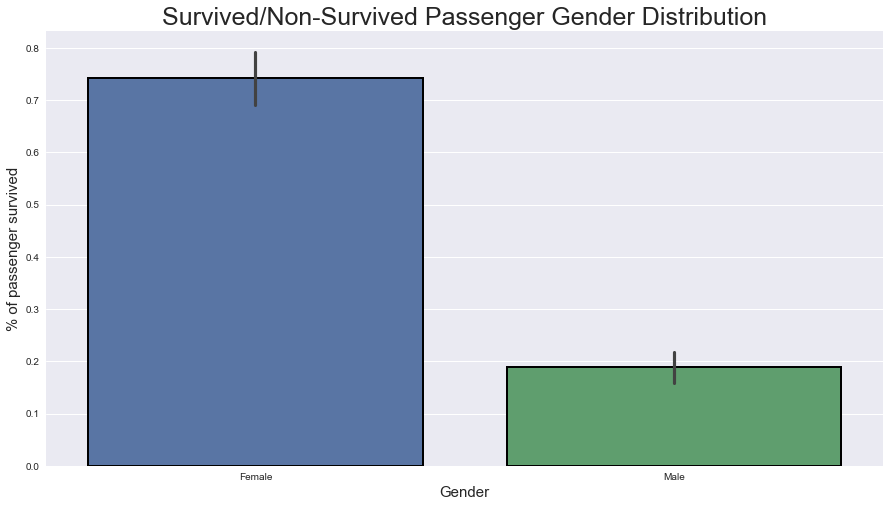

In [54]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Gender", y = "Survived", data=df, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)

labels = ['Female', 'Male']
plt.xticks(sorted(df.Gender.unique()), labels);

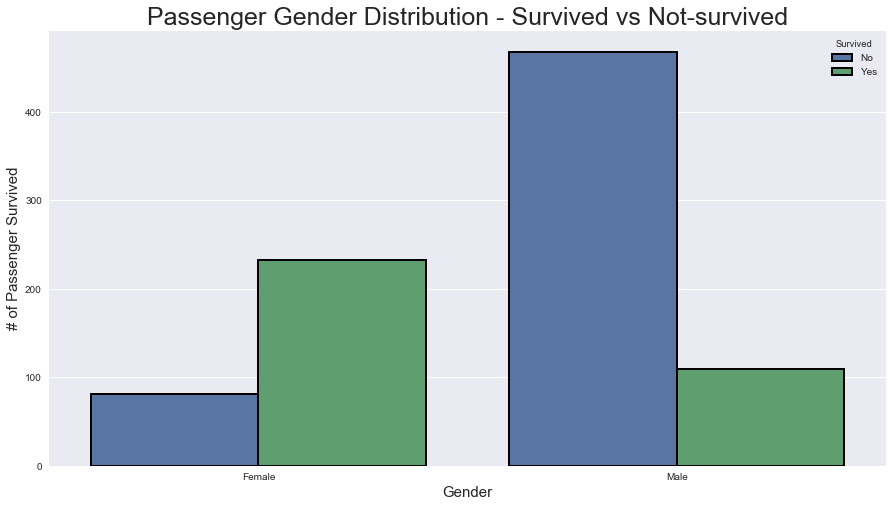

In [55]:
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Gender", 
                   hue="Survived",
                   data = df,
                   edgecolor=(0,0,0), 
                   linewidth=2)
## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Gender", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
labels = ['Female', 'Male']
plt.xticks(sorted(df.Gender.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()


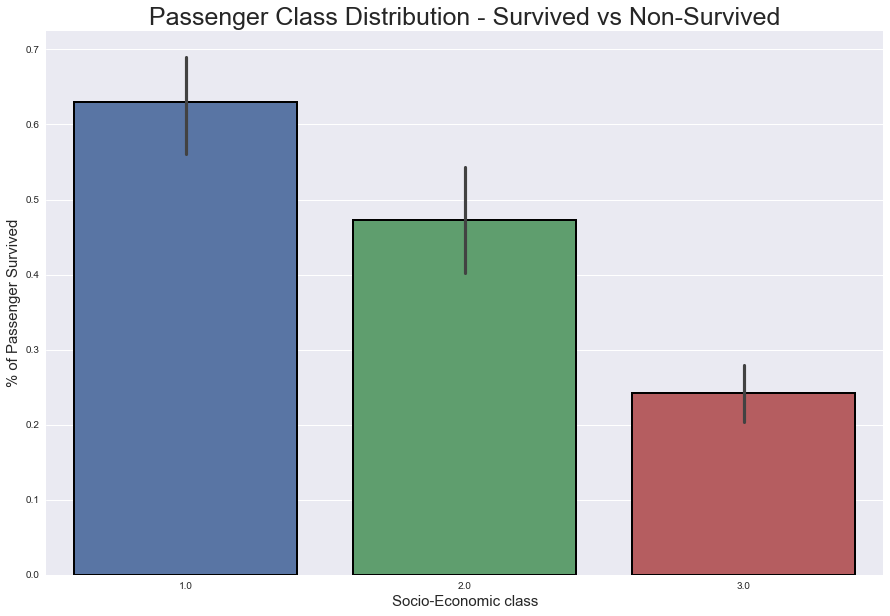

In [56]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", y = "Survived", data=df, edgecolor=(0,0,0), linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);



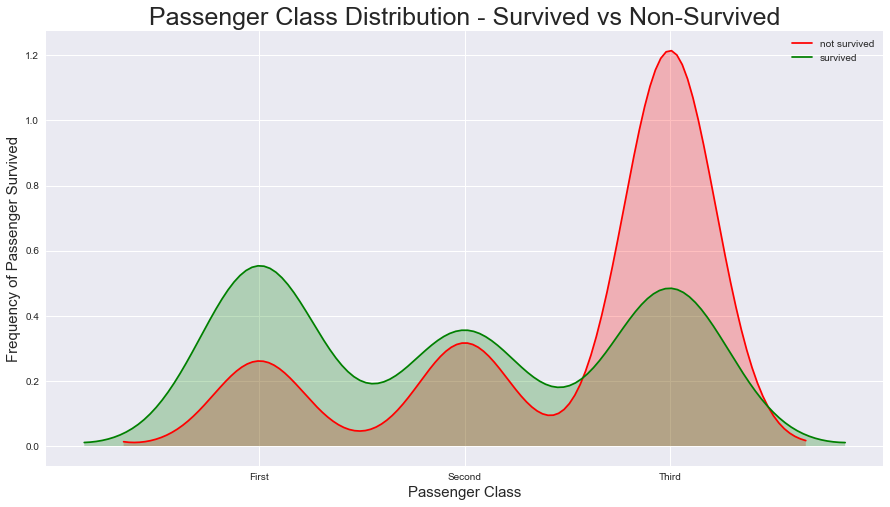

In [57]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'] , color='g',shade=True, label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)

## Converting xticks into words for better understanding
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()), labels);


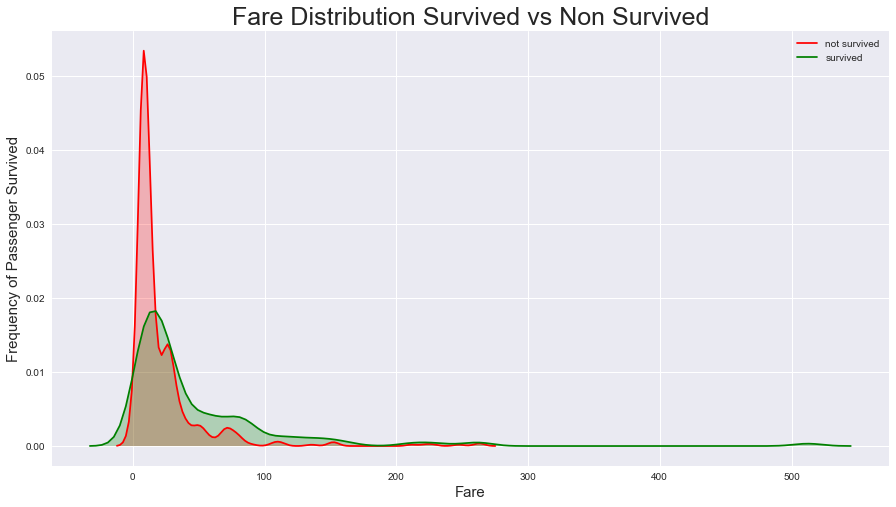

In [58]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)

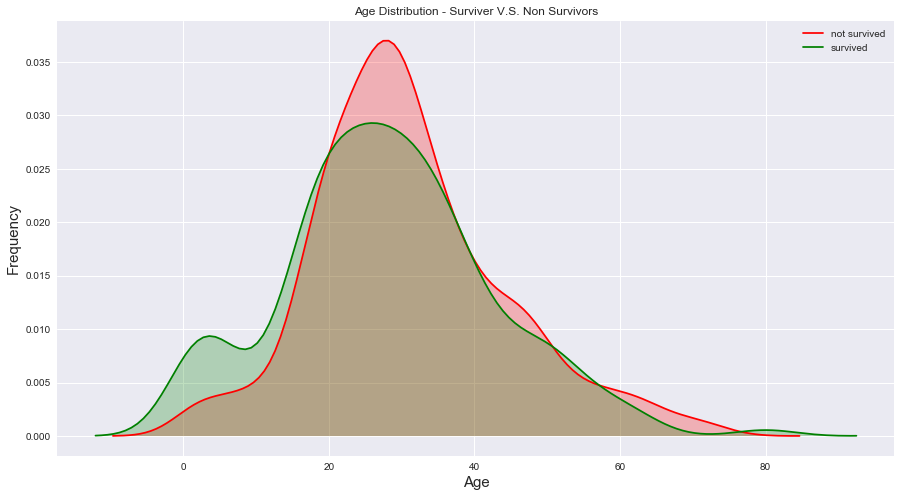

In [59]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Age'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors')
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

# Part 4: Modeling the Data

I will train the data with the following models:

    Logistic Regression
    K-Nearest Neighbors(KNN)
    Gaussian Naive Bayes
    Support Vector Machines
    Decision Tree Classifier
    Bagging on Decision Tree Classifier
    Random Forest Classifier
    Gradient Boosting Classifier


In [60]:
# separating our independent and dependent variable
X = df.drop(['Survived'], axis=1)
y = df["Survived"]


# 4a. Splitting the training data¶

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 1)


# 4b. Feature Scaling

In [62]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [63]:
## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier

# 4c. Machine Learning Models

In [65]:
#4c1. Logistic Regression
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
logreg_accy = round(accuracy_score(y_pred,y_test), 3)
print (logreg_accy)

0.783


In [67]:


print (classification_report(y_test, y_pred, labels=logreg.classes_))
print (confusion_matrix(y_pred, y_test))



             precision    recall  f1-score   support

        0.0       0.80      0.84      0.82       174
        1.0       0.75      0.70      0.73       121

avg / total       0.78      0.78      0.78       295

[[146  36]
 [ 28  85]]


# Grid Search on Logistic Regression¶

In [70]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, 
          .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, 
                    param,
                    verbose=False, 
                    cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True),
                    n_jobs=1)

In [75]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.13, 0.2, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 4.0, 4.5, 5.0, 5.1, 5.5, 6.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=False)

In [76]:
print (grid.best_params_)
print (grid.best_score_)

{'penalty': 'l1', 'C': 100.0}
0.820469798658


In [78]:
logreg_grid = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'])
logreg_grid.fit(x_train,y_train)
y_pred = logreg_grid.predict(x_test)
logreg_accy = round(accuracy_score(y_test, y_pred), 3)
print (logreg_accy)

0.78


0.820651657642


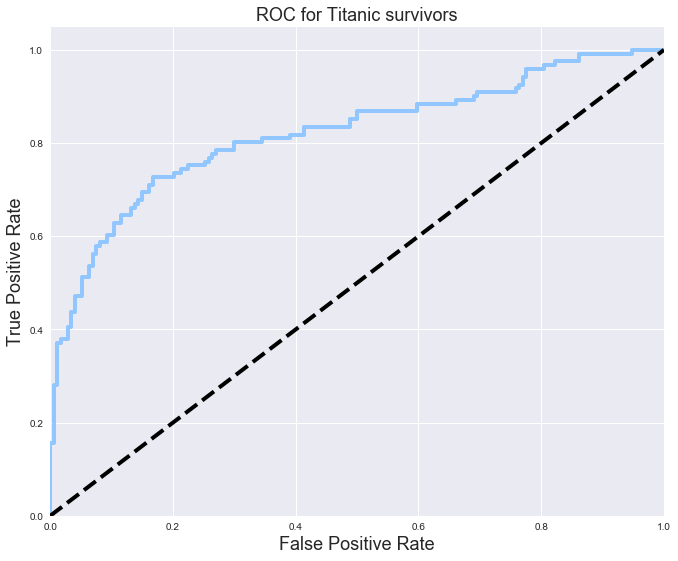

In [81]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-pastel')
y_score = logreg_grid.decision_function(x_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)
plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

# KNN classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="uniform", )
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)

0.773


# Grid search on KNN classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
n_neighbors=range(1,10)
weights=['uniform','distance']
param = {'n_neighbors':n_neighbors, 'weights':weights}
grid2 = GridSearchCV(knn, param,verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
grid2.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=False)

In [84]:
print (grid2.best_params_)
print (grid2.best_score_)


{'n_neighbors': 8, 'weights': 'uniform'}
0.835570469799


In [85]:
knn_grid = KNeighborsClassifier(
    n_neighbors = grid2.best_params_['n_neighbors'], 
    weights = grid2.best_params_['weights'],
    n_jobs = 1, 
)
knn_grid.fit(x_train,y_train)
y_pred = knn_grid.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)

0.793


# Gaussian Naive Bayes

In [86]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)



0.753


In [87]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy)

0.79


In [88]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier( max_depth=5, 
                                class_weight = 'balanced',
                                min_weight_fraction_leaf = 0.01)
dectree.fit(x_train, y_train)
y_pred = dectree.predict(x_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)


0.776


In [89]:
max_depth = range(1,10)
max_feature = [1,2,3,4,5,6,7,8,'auto']
grid3 = {'max_depth':max_depth, 'max_features':max_feature}
decisiontree_grid = GridSearchCV(dectree, grid3, verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
decisiontree_grid.fit(x_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.01,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 'auto'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=False)

In [90]:
print( decisiontree_grid.best_params_)
print (decisiontree_grid.best_score_)

{'max_features': 8, 'max_depth': 3}
0.830536912752
